<a href="https://colab.research.google.com/github/nagamamo/international_finance/blob/main/2_balance_of_payment_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第2回　世界各国の国際収支データの取得と分析

　第2回国際金融プログラミングデモでは、国際収支データを用いたデータサイエンス分析を行います。本例では、ライブラリwbgapiを用いて世界銀行データを取得し、統計分析します。

1.　パッケージのインストール

In [ ]:
pip install wbgapi

2.　ライブラリの読み込み

  　ここではデータ取得と分析に必要なライブラリをインポートします。今回使用するのはwbgapi、pandas_datareader、pandas、datetime、numpy、matplotlibの6種類です。

In [ ]:
#[2]ライブラリの読み込み
import wbgapi as wb #世界銀行データ取得のためのライブラリ
import pandas_datareader as data #データ取得ライブラリ
import pandas as pd #データセット管理のためのライブラリ
import datetime #時系列データ管理のためのライブラリ
import numpy as np #統計処理のためのライブラリ
import matplotlib.pyplot as plt #図表作成のためのライブラリ

3．データコードの検索

　世界銀行データから国際収支統計を取得するためには、必要なデータのコードと国・地域コードが必要になります。まず、データコードの検索方法は次の通りです。本例では経常収支(Current Account)を検索します。

In [ ]:
#[3]データコードの検索
display(wb.series.info(q='portfolio'))

4．国・地域コードの検索

　次に、国・地域コードの検索方法は次の通りです。国・地域コードの場合は全コード一覧が表示されます。

In [ ]:
"[4]国コードの検索"
display(wb.economy.info())

5.　日本・米国・中国のISバランス対GDP比のデータ取得と分析

  　本例では日本、米国、中国の経常収支対GDP比のデータを取得し、可視化します。取得する国／地域を変更する場合は以下のセルの1行目、取得するデータを変更する場合はセルの2行目を書き換えてください。標本期間の変更は3行目の修正です。
  　標本期間を指定するのではなく、直近から数年間（mrv=  )という指示により、データを取得することも可能です（#4行目）。取得した複数の国のたデータは、最初は一列に並んでいるため、unstack()により国別のデータ配列に整形します。

In [ ]:
#[5]ISバランスデータの取得
countries = ["JPN","USA","CHN"] #国・地域コードの指定
indicators = {'BN.CAB.XOKA.GD.ZS'} #変数コードの指定
df=wb.data.DataFrame(indicators,countries, time=range(2000, 2022), skipBlanks=True, columns='series')
#df=wb.data.DataFrame(indicators,countries, mrv=5)
df.rename(columns={'BN.CAB.XOKA.GD.ZS': 'IS_Balance per GDP'},inplace=True) #変数名の修正
dfu = df.unstack(level=0) #データ配列の整形
dfu

6.　可視化と記述統計の算出

　得られた日米中3カ国のISバランスデータ（対GDP比）を、matplotlibによりを可視化します。2行目ではpandasにより記述統計を算出します。本グラフと記述統計が示しているのは、日本と中国のマクロ経済は国内貯蓄超過（＞国内投資）、米国は国内投資超過（＜国内貯蓄）という点です。「国際金融論」とは、この貯蓄超過国から投資超過国への資本流入形態、資本流入決定要因、を分析する経済ファイナンス理論です。重要な点は、米中新冷戦時代の到来により、2020年代は、中国資本の米国市場への流入が遮断され、「デカップリング」と称される状況が国際金融面から拍車がかけられていることです。

In [ ]:
#[6]可視化と記述統計
dfu.plot();
dfu.describe()

7    貿易収支データの取得

7.1 輸出額（対GDP比）データの取得

　本節では、国際収支統計の経常勘定である、輸出、輸入データ（対GDP比）の取得手順を示します。日本の輸出額、輸入額の例を示しますが、1行目を変更することで、世界190カ国いずれの国のデータの取得が可能です。

In [ ]:
#[7]輸出対GDP比(日本)データの取得
countries = ["JPN"]
indicators = {'NE.EXP.GNFS.ZS':'Exports of Goods and Services Japan'}
df=wb.data.DataFrame(indicators,countries, time=range(1970, 2022), skipBlanks=True, columns='series')
df.rename(columns={'NE.EXP.GNFS.ZS': 'Exports of Goods and Services: Japan'},inplace=True) #変数名の修正
df.plot();

7.2 輸入額（対GDP比）データの取得

　続いて、日本の輸入額（対GDP比）のデータを可視化します。2010年代初頭以降、エネルギ―輸入額の増大により、輸入規模が上昇し続けていることが、近年の貿易サービス収支の悪化の一因となっています。

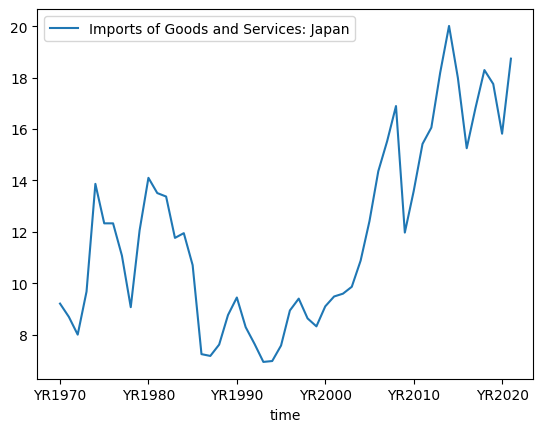

In [ ]:
#[8]輸入対GDP比(日本)データの取得
countries = ["JPN"]
indicators = {'NE.IMP.GNFS.ZS':'Imports of Goods and Services Japan'}
df=wb.data.DataFrame(indicators,countries, time=range(1970, 2022), skipBlanks=True, columns='series')
df.rename(columns={'NE.IMP.GNFS.ZS': 'Imports of Goods and Services: Japan'},inplace=True) #変数名の修正
df.plot();

8　金融収支データの取得

8.1　　対内株式投資データの取得

　「国際金融論」は、金融収支は、経常収支よりも、より重要な国際収支項目です。以下は、国内投資超過（＝国内貯蓄不足）の米国への海外からの対内株式投資（対GDP比）を可視化しています。2016年のトランプ政権以降、流入規模は拡大するものの、流出（米国株式の売却）も度々大規模に発生していることがわかります。

In [ ]:
#[9]対米株式投資(対GDP比)
countries = ["USA"]
indicators = {'BX.PEF.TOTL.CD.WD'}
df=wb.data.DataFrame(indicators,countries, time=range(1970, 2022), skipBlanks=True, columns='series')
df.rename(columns={'BX.PEF.TOTL.CD.WD': 'Inward Equity Investment: USA'},inplace=True) #変数名の修正
df.plot();

8.2　　世界150カ国ISバランス・リーグテーブルの作成

　最後に、世界ではどの国が貯蓄超過（資本供給国）であり、どの国が投資超過国（資本受入国）であるのかを確認するため、ISバランス（対GDP比）のリーグテーブルの作成手順を説明します。以下の例は世界銀行データの2020年のみのデータを用い、2行目で大きい順から小さい順へ並べ替えています。

In [ ]:
#[10]世界150カ国のISバランス(対GDP比)データの取得と並べ替え
df=wb.data.DataFrame('BN.CAB.XOKA.GD.ZS', time=2020, labels=True)
df_s = df.sort_values(by="BN.CAB.XOKA.GD.ZS", ascending=False).head(150)
df_s.rename(columns={'BN.CAB.XOKA.GD.ZS': 'IS_Balance per GDP'},inplace=True) #変数名の修正
df_s

,Country,IS_Balance per GDP
economy,,
KIR,Kiribati,40.144897
MHL,Marshall Islands,37.349101
KWT,Kuwait,20.792795
GIN,Guinea,18.936247
TUV,Tuvalu,17.421524
...,...,...
LBY,Libya,-10.212311
KNA,St. Kitts and Nevis,-10.886162
RWA,Rwanda,-12.066546
